#                     Desafio Cientista de Dados   Lighthouse 

Objetivo: Modelo de previsão de preços para criação de plataforma de aluguéis temporários na cidade de Nova York.

In [61]:
#import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [64]:
# Lendo csv em um DataFrame e exibindo amostra

file_path = os.path.abspath('teste_indicium_precificacao.csv')
df = pd.read_csv(file_path)
df.head()


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [52]:
# Imprimindo informações do DataFrame
print("\033[1mInfo:\033[0m") 
print(df.info())

# Imprimindo as dimensões do DataFrame 
print("\n\033[1mDimensões:\033[0m")
print(df.shape)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non

# Encontrando e removendo valores Nulos


In [53]:
# Verificado se existe valores nulos 
print("\033[1mValores Nulos:\033[0m") 
df.isnull().sum()

Valores Nulos:


id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [54]:
#Dropando os valores que são nulos
df = df.dropna()

# Pré processamento

In [70]:
# Convertendo variável para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')

# Removendo espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Convertendo colunas para float, tratando valores não numéricos
convert_columns_to_float = ['nome', 'host_name', 'bairro_group', 'bairro', 'room_type']
for col in convert_columns_to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verifica alterações
print(df.dtypes)


id                                        int64
nome                                    float64
host_id                                   int64
host_name                               float64
bairro_group                            float64
bairro                                  float64
latitude                                float64
longitude                               float64
room_type                               float64
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object


# Análise exploratória

In [65]:
# Resumo estatístico das variáveis 
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         

Ao analisar o resumo estatístico, destaca-se que o preço médio por noite dos aluguéis é $152,00, oferecendo uma visão direta do custo médio para os usuários que buscam reservar uma acomodação. Além disso, a média de 23 avaliações por acomodação sugere um nível moderado de atividade e feedback dos usuários, proporcionando uma visão geral do engajamento e da experiência dos hóspedes.

# Matriz de Correlação

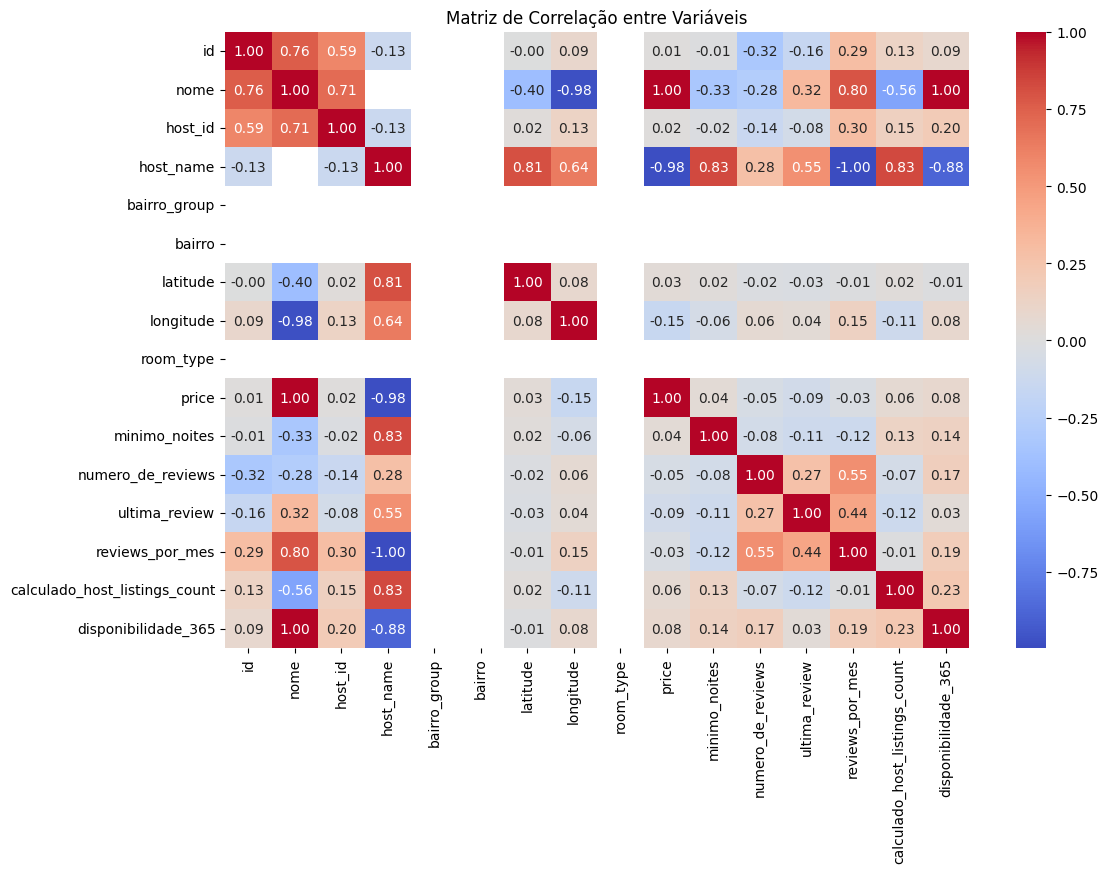

In [71]:
# Criando a matriz de correlação
correlation_matrix = df.corr()
# Visualização da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


# Análise de algumas hipóteses de negócio
